<a href="https://colab.research.google.com/github/crisalex25/TFM/blob/main/TFM_v1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo de Fin de Master**
## **Máster Universitario en Inteligencia Artificial para el Sector de la Energía y las Infraestructuras**
Optimización de generación en centrales hidroeléctricas mediante técnicas de aprendizaje automático

## Pronóstico


###Librerias

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###Leer Dataset

In [2]:
AC="https://raw.githubusercontent.com/crisalex25/TFM/main/AC1.csv"
GC="https://raw.githubusercontent.com/crisalex25/TFM/main/GC1.csv"
PD="https://raw.githubusercontent.com/crisalex25/TFM/main/PrecD1.csv"


In [3]:
dfAC=pd.read_csv(AC, sep=';', decimal=",")
dfGC=pd.read_csv(GC, sep=';', decimal=",")
dfPD=pd.read_csv(PD, sep=';', decimal=",")

###Graficas

In [4]:
df1=dfAC
df2=dfGC
df3=dfPD

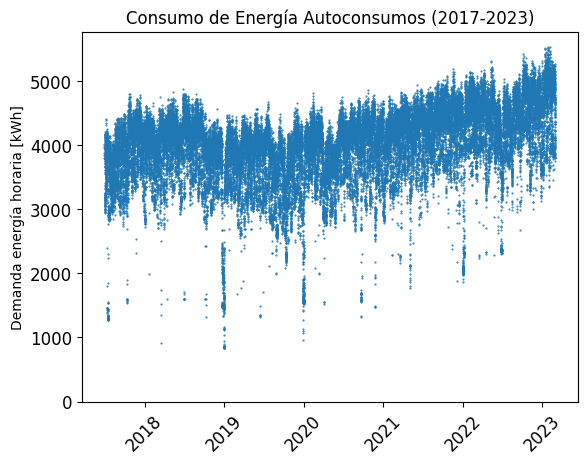

In [5]:
# Crear un DataFrame de ejemplo
df1 = pd.DataFrame(df1)

# Convertir la columna 'Fecha_Hora' a formato de fecha y hora
df1['Fecha_Hora'] = pd.to_datetime(df1['Fecha_Hora'],format='%d/%m/%Y %H:%M',dayfirst=True)

# Crear la gráfica de línea de tiempo
plt.plot(df1['Fecha_Hora'], df1['valor'], marker='o', linestyle='', markersize=0.5)

# Personalizar la gráfica
plt.ylim(bottom=0)
plt.ylabel('Demanda energía horaria [kWh]')
plt.title('Consumo de Energía Autoconsumos (2017-2023)')
plt.yticks(fontsize=12)
plt.xticks(rotation=45, fontsize=12)

# Mostrar la gráfica
plt.show()


In [10]:
df1.head()

,Fecha_Hora,valor
0,2017-07-01 01:00:00,4015.284
1,2017-07-01 02:00:00,3874.093
2,2017-07-01 03:00:00,3951.663
3,2017-07-01 04:00:00,3987.643
4,2017-07-01 05:00:00,3848.389


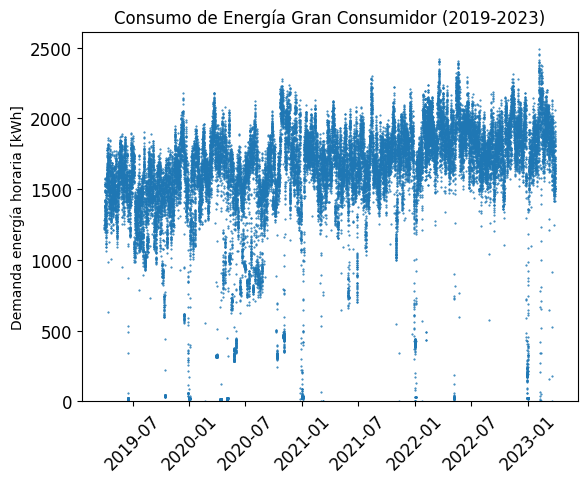

In [7]:
# Crear un DataFrame de ejemplo
df2 = pd.DataFrame(df2)

# Convertir la columna 'Fecha_Hora' a formato de fecha y hora
df2['Fecha_Hora'] = pd.to_datetime(df2['Fecha_Hora'],format='%d/%m/%Y %H:%M',dayfirst=True)

# Crear la gráfica de línea de tiempo
plt.plot(df2['Fecha_Hora'], df2['valor'], marker='o', linestyle='', markersize=0.5)

# Personalizar la gráfica
plt.ylim(bottom=0)
plt.ylabel('Demanda energía horaria [kWh]')
plt.title('Consumo de Energía Gran Consumidor (2019-2023)')
plt.yticks(fontsize=12)
plt.xticks(rotation=45, fontsize=12)

# Mostrar la gráfica
plt.show()

In [9]:
df2.head()

,Fecha_Hora,valor
0,2019-04-01 01:00:00,1227.098
1,2019-04-01 02:00:00,1222.091
2,2019-04-01 03:00:00,1250.153
3,2019-04-01 04:00:00,1230.798
4,2019-04-01 05:00:00,1283.382


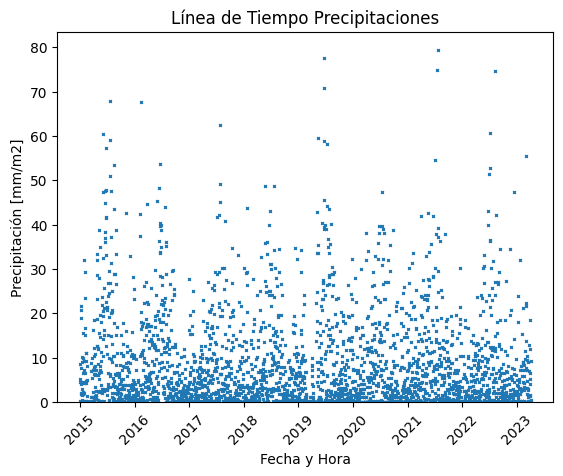

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Crear un DataFrame de ejemplo
df = pd.DataFrame(df3)

# Convertir la columna 'Fecha_Hora' a formato de fecha y hora
df['Fecha_Hora'] = pd.to_datetime(df['Fecha_Hora'],format='%d/%m/%Y %H:%M',dayfirst=True)

# Crear la gráfica de línea de tiempo
plt.plot(df['Fecha_Hora'], df['valor'], marker='x', linestyle='', markersize=2)

# Personalizar la gráfica
plt.ylim(bottom=0)
plt.xlabel('Fecha y Hora')
plt.ylabel('Precipitación [mm/m2]')
plt.title('Línea de Tiempo Precipitaciones')
plt.xticks(rotation=45)
plt.figure(figsize=(12,8))

# Mostrar la gráfica
plt.show()

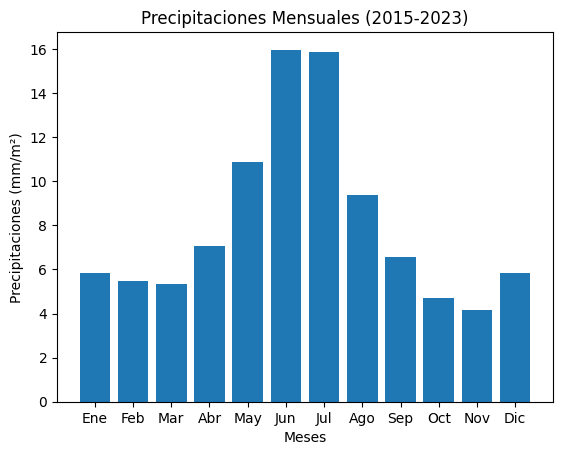

In [ ]:
df3 = pd.DataFrame(df3)

# Convertir la columna 'Tiempo' a formato de fecha
df3['Fecha_Hora'] = pd.to_datetime(df3['Fecha_Hora'], format='%d/%m/%Y %H:%M',dayfirst=True)

# Agregar una columna de Meses
df3['Meses'] = df3['Fecha_Hora'].dt.month

# Calcular las precipitaciones mensuales
precipitaciones_mensuales = df3.groupby('Meses')['valor'].mean()

# Crear la gráfica de barras
plt.bar(precipitaciones_mensuales.index, precipitaciones_mensuales)

# Personalizar la gráfica
plt.xlabel('Meses')
plt.ylabel('Precipitaciones (mm/m²)')
plt.title('Precipitaciones Mensuales (2015-2023)')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Mostrar la gráfica
plt.show()

##Modelos

####Arima

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Cargar el DataFrame dfAC
# Supongamos que ya tienes el DataFrame cargado correctamente

# Convertir la columna 'Fecha_Hora' a formato de fecha
dfAC['Fecha_Hora'] = pd.to_datetime(dfAC['Fecha_Hora'], format='%d/%m/%Y %H:%M', dayfirst=True)

# Establecer la columna 'Fecha_Hora' como el índice del DataFrame
dfAC.set_index('Fecha_Hora', inplace=True)

# Seleccionar solo la columna de demanda de energía
endog = dfAC['valor']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
train_size = int(len(endog) * 0.8)
train_data, test_data = endog[:train_size], endog[train_size:]

# Crear y entrenar el modelo ARIMA
model = ARIMA(train_data, order=(1, 0, 0))  # Configurar los parámetros del modelo ARIMA (p, d, q)
model_fit = model.fit()

# Realizar predicciones en el conjunto de prueba
predictions = model_fit.predict(start=len(train_data), end=len(endog) - 1)

# Calcular el error cuadrático medio (MSE) en el conjunto de prueba
mse = mean_squared_error(test_data, predictions)
print("Error cuadrático medio (MSE):", mse)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Error cuadrático medio (MSE): 472358.11199470126


Error Cuadrático Medio (MSE): 472358.11199470126


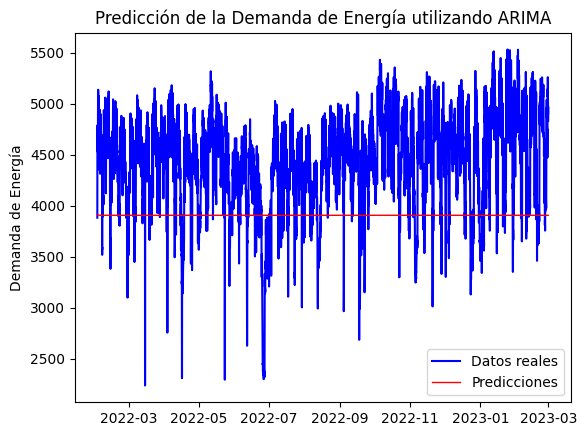

In [ ]:
# Evaluar el modelo utilizando el error cuadrático medio (MSE)
mse = mean_squared_error(test_data, predictions)
print('Error Cuadrático Medio (MSE):', mse)

# También puedes visualizar los resultados para tener una idea de las predicciones
plt.plot(test_data.index, test_data.values, color='blue', label='Datos reales')
plt.plot(test_data.index, predictions, color='red', linewidth=1, label='Predicciones')
plt.ylabel('Demanda de Energía')
plt.title('Predicción de la Demanda de Energía utilizando ARIMA')
plt.legend()
plt.show()

####Red neuronal LSTM 

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def train_lstm_model(df, sequence_length=24, epochs=20, batch_size=16, validation_split=0.2, patience=3):
    # Extraer la columna de demanda de energía
    demand_data = df['valor'].values

    # Normalizar los datos
    scaler = MinMaxScaler(feature_range=(0, 1))
    demand_data_normalized = scaler.fit_transform(demand_data.reshape(-1, 1))

    # Dividir los datos en conjuntos de entrenamiento y prueba
    train_size = int(len(demand_data_normalized) * (1 - validation_split))
    train_data, test_data = demand_data_normalized[:train_size], demand_data_normalized[train_size:]

    # Crear secuencias de entrada y salida para el entrenamiento de la red neuronal
    def create_sequences(data, seq_length):
        X = []
        y = []
        for i in range(len(data) - seq_length):
            X.append(data[i:i+seq_length])
            y.append(data[i+seq_length])
        return np.array(X), np.array(y)

    X_train, y_train = create_sequences(train_data, sequence_length)
    X_test, y_test = create_sequences(test_data, sequence_length)

    # Crear el modelo de red neuronal
    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=(sequence_length, 1)))
    model.add(Dense(1))

    model.compile(optimizer=Adam(), loss='MSE', metrics=["accuracy"])

    # Entrenar el modelo
    early_stopping = EarlyStopping(patience=patience)  # Detener el entrenamiento si no hay mejora en el número de épocas especificado
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[early_stopping])

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Desnormalizar los datos de predicción
    y_pred_denormalized = scaler.inverse_transform(y_pred)
    y_test_denormalized = scaler.inverse_transform(y_test.reshape(-1, 1))

    return y_pred_denormalized, y_test_denormalized, train_size


####Red neuronal

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def train_dense_model(df, sequence_length=24, epochs=20, batch_size=16, validation_split=0.2, patience=3):
    # Extraer la columna de demanda de energía
    demand_data = df['valor'].values

    # Normalizar los datos
    scaler = MinMaxScaler(feature_range=(0, 1))
    demand_data_normalized = scaler.fit_transform(demand_data.reshape(-1, 1))

    # Dividir los datos en conjuntos de entrenamiento y prueba
    train_size = int(len(demand_data_normalized) * (1 - validation_split))
    train_data, test_data = demand_data_normalized[:train_size], demand_data_normalized[train_size:]

    # Crear secuencias de entrada y salida para el entrenamiento de la red neuronal
    def create_sequences(data, seq_length):
        X = []
        y = []
        for i in range(len(data) - seq_length):
            X.append(data[i:i+seq_length])
            y.append(data[i+seq_length])
        return np.array(X), np.array(y)

    X_train, y_train = create_sequences(train_data, sequence_length)
    X_test, y_test = create_sequences(test_data, sequence_length)

    # Crear el modelo de red neuronal
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(sequence_length,)))
    model.add(Dense(64, activation='relu'))  
    model.add(Dense(32, activation='relu'))  
    model.add(Dense(1))

    model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=["accuracy"])

    # Entrenar el modelo
    early_stopping = EarlyStopping(patience=patience)  # Detener el entrenamiento si no hay mejora en el número de épocas especificado
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[early_stopping])

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Desnormalizar los datos de predicción y los valores reales
    y_pred_denormalized = scaler.inverse_transform(y_pred)
    y_test_denormalized = scaler.inverse_transform(y_test.reshape(-1, 1))
    
    return y_pred_denormalized, y_test_denormalized, train_size


###Autoconsumos

####LSTM AutoConsumo

In [25]:
y_pred_denormalized, y_test_denormalized, train_size = train_lstm_model(dfAC)

Epoch 1/20
2515/2515 [==============================] - 47s 18ms/step - loss: 0.0031 - accuracy: 2.4852e-05 - val_loss: 8.9330e-04 - val_accuracy: 9.9582e-05
Epoch 2/20
2515/2515 [==============================] - 38s 15ms/step - loss: 8.2735e-04 - accuracy: 2.4852e-05 - val_loss: 8.8526e-04 - val_accuracy: 9.9582e-05
Epoch 3/20
2515/2515 [==============================] - 38s 15ms/step - loss: 7.6293e-04 - accuracy: 2.4852e-05 - val_loss: 7.3487e-04 - val_accuracy: 9.9582e-05
Epoch 4/20
2515/2515 [==============================] - 41s 16ms/step - loss: 7.5189e-04 - accuracy: 2.4852e-05 - val_loss: 7.8461e-04 - val_accuracy: 9.9582e-05
Epoch 5/20
2515/2515 [==============================] - 45s 18ms/step - loss: 7.3994e-04 - accuracy: 2.4852e-05 - val_loss: 7.6647e-04 - val_accuracy: 9.9582e-05
Epoch 6/20
314/314 [==============================] - 2s 5ms/step


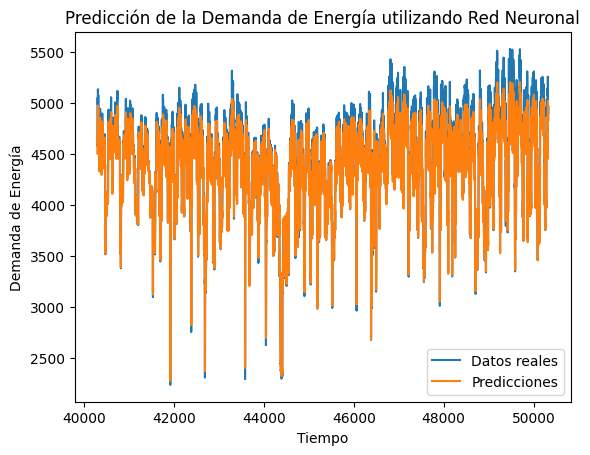

In [26]:
# Obtener las fechas correspondientes al conjunto de prueba
sequence_length=24
fechas_test = dfAC.index[train_size + sequence_length:]

# Visualizar los resultados
plt.plot(fechas_test, y_test_denormalized, label='Datos reales')
plt.plot(fechas_test, y_pred_denormalized, label='Predicciones')
plt.xlabel('Tiempo')
plt.ylabel('Demanda de Energía')
plt.title('Predicción de la Demanda de Energía utilizando Red Neuronal')
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calcular el error absoluto medio (MAE) y el error cuadrático medio (MSE)
mae = mean_absolute_error(y_test_denormalized, y_pred_denormalized)
mse = mean_squared_error(y_test_denormalized, y_pred_denormalized)
r2 = r2_score(y_test_denormalized, y_pred_denormalized)

print('Error absoluto medio (MAE):', mae)
print('Error cuadrático medio (MSE):', mse)
print('Coeficiente de determinación (R^2):', r2)


Error absoluto medio (MAE): 90.89296254092189
Error cuadrático medio (MSE): 19387.508803865832
Coeficiente de determinación (R^2): 0.9056086822972297


####Red Neuronal Autoconsumo

In [18]:
y_pred_denormalized, y_test_denormalized, train_size = train_dense_model(dfAC)

Epoch 1/20
2515/2515 [==============================] - 11s 4ms/step - loss: 0.0017 - accuracy: 2.4852e-05 - val_loss: 8.8320e-04 - val_accuracy: 9.9582e-05
Epoch 2/20
2515/2515 [==============================] - 6s 2ms/step - loss: 9.4967e-04 - accuracy: 2.4852e-05 - val_loss: 0.0011 - val_accuracy: 9.9582e-05
Epoch 3/20
2515/2515 [==============================] - 7s 3ms/step - loss: 9.1091e-04 - accuracy: 2.4852e-05 - val_loss: 8.2975e-04 - val_accuracy: 9.9582e-05
Epoch 4/20
2515/2515 [==============================] - 7s 3ms/step - loss: 8.6681e-04 - accuracy: 2.4852e-05 - val_loss: 8.4219e-04 - val_accuracy: 9.9582e-05
Epoch 5/20
2515/2515 [==============================] - 6s 2ms/step - loss: 8.5007e-04 - accuracy: 2.4852e-05 - val_loss: 7.2647e-04 - val_accuracy: 9.9582e-05
Epoch 6/20
2515/2515 [==============================] - 6s 2ms/step - loss: 8.1972e-04 - accuracy: 2.4852e-05 - val_loss: 7.3617e-04 - val_accuracy: 9.9582e-05
Epoch 7/20
2515/2515 [=========================

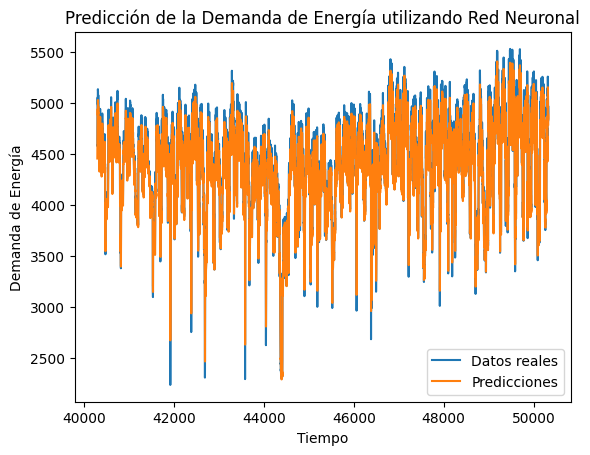

In [19]:
# Obtener las fechas correspondientes al conjunto de prueba
sequence_length=24
fechas_test = dfAC.index[train_size + sequence_length:]

# Visualizar los resultados
plt.plot(fechas_test, y_test_denormalized, label='Datos reales')
plt.plot(fechas_test, y_pred_denormalized, label='Predicciones')
plt.xlabel('Tiempo')
plt.ylabel('Demanda de Energía')
plt.title('Predicción de la Demanda de Energía utilizando Red Neuronal')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calcular el error absoluto medio (MAE) y el error cuadrático medio (MSE)
mae = mean_absolute_error(y_test_denormalized, y_pred_denormalized)
mse = mean_squared_error(y_test_denormalized, y_pred_denormalized)
r2 = r2_score(y_test_denormalized, y_pred_denormalized)

print('Error absoluto medio (MAE):', mae)
print('Error cuadrático medio (MSE):', mse)
print('Coeficiente de determinación (R^2):', r2)

Error absoluto medio (MAE): 95.70022746593216
Error cuadrático medio (MSE): 19231.050379199874
Coeficiente de determinación (R^2): 0.9063704262128263


###Gran Consumidor

####Red neuronal LSTM 1 Granconsumidor


In [28]:
y_pred_denormalized, y_test_denormalized, train_size = train_lstm_model(dfGC)

Epoch 1/20
1786/1786 [==============================] - 30s 16ms/step - loss: 0.0041 - accuracy: 4.5512e-04 - val_loss: 0.0015 - val_accuracy: 9.8259e-04
Epoch 2/20
1786/1786 [==============================] - 26s 15ms/step - loss: 0.0013 - accuracy: 5.6015e-04 - val_loss: 0.0012 - val_accuracy: 9.8259e-04
Epoch 3/20
1786/1786 [==============================] - 27s 15ms/step - loss: 0.0012 - accuracy: 5.6015e-04 - val_loss: 0.0013 - val_accuracy: 9.8259e-04
Epoch 4/20
1786/1786 [==============================] - 27s 15ms/step - loss: 0.0011 - accuracy: 5.6015e-04 - val_loss: 0.0014 - val_accuracy: 9.8259e-04
Epoch 5/20
1786/1786 [==============================] - 26s 15ms/step - loss: 0.0011 - accuracy: 5.6015e-04 - val_loss: 0.0012 - val_accuracy: 9.8259e-04
Epoch 6/20
1786/1786 [==============================] - 26s 15ms/step - loss: 0.0011 - accuracy: 5.6015e-04 - val_loss: 0.0011 - val_accuracy: 9.8259e-04
Epoch 7/20
1786/1786 [==============================] - 26s 15ms/step - loss

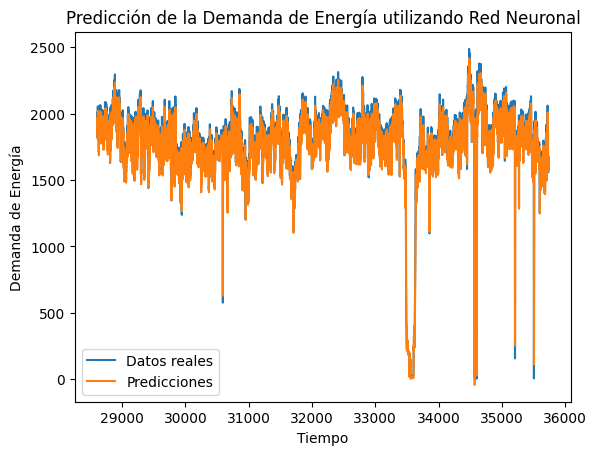

In [29]:
# Obtener las fechas correspondientes al conjunto de prueba
sequence_length=24
fechas_test = dfGC.index[train_size + sequence_length:]

# Visualizar los resultados
plt.plot(fechas_test, y_test_denormalized, label='Datos reales')
plt.plot(fechas_test, y_pred_denormalized, label='Predicciones')
plt.xlabel('Tiempo')
plt.ylabel('Demanda de Energía')
plt.title('Predicción de la Demanda de Energía utilizando Red Neuronal')
plt.legend()
plt.show()

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calcular el error absoluto medio (MAE) y el error cuadrático medio (MSE)
mae = mean_absolute_error(y_test_denormalized, y_pred_denormalized)
mse = mean_squared_error(y_test_denormalized, y_pred_denormalized)
r2 = r2_score(y_test_denormalized, y_pred_denormalized)

print('Error absoluto medio (MAE):', mae)
print('Error cuadrático medio (MSE):', mse)
print('Coeficiente de determinación (R^2):', r2)



Error absoluto medio (MAE): 60.49338245258366
Error cuadrático medio (MSE): 7841.54096301264
Coeficiente de determinación (R^2): 0.9168488164349976


####Red Neuronal 1 GranConsumidor

In [21]:
y_pred_denormalized, y_test_denormalized, train_size = train_dense_model(dfGC)

Epoch 1/20
1786/1786 [==============================] - 7s 2ms/step - loss: 0.0021 - accuracy: 5.6015e-04 - val_loss: 0.0017 - val_accuracy: 9.8259e-04
Epoch 2/20
1786/1786 [==============================] - 5s 3ms/step - loss: 0.0013 - accuracy: 5.6015e-04 - val_loss: 0.0012 - val_accuracy: 9.8259e-04
Epoch 3/20
1786/1786 [==============================] - 5s 3ms/step - loss: 0.0012 - accuracy: 5.6015e-04 - val_loss: 0.0012 - val_accuracy: 9.8259e-04
Epoch 4/20
1786/1786 [==============================] - 4s 2ms/step - loss: 0.0012 - accuracy: 5.6015e-04 - val_loss: 0.0013 - val_accuracy: 9.8259e-04
Epoch 5/20
1786/1786 [==============================] - 5s 3ms/step - loss: 0.0012 - accuracy: 5.6015e-04 - val_loss: 0.0019 - val_accuracy: 9.8259e-04
Epoch 6/20
1786/1786 [==============================] - 5s 3ms/step - loss: 0.0012 - accuracy: 5.6015e-04 - val_loss: 0.0012 - val_accuracy: 9.8259e-04
Epoch 7/20
1786/1786 [==============================] - 4s 2ms/step - loss: 0.0011 - acc

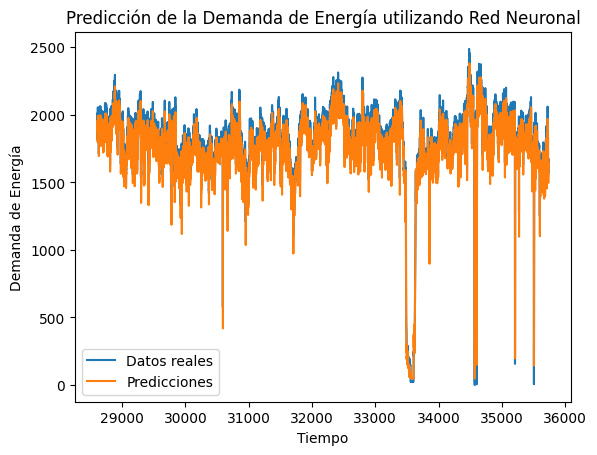

In [22]:
# Obtener las fechas correspondientes al conjunto de prueba
sequence_length=24
fechas_test = dfGC.index[train_size + sequence_length:]

# Visualizar los resultados
plt.plot(fechas_test, y_test_denormalized, label='Datos reales')
plt.plot(fechas_test, y_pred_denormalized, label='Predicciones')
plt.xlabel('Tiempo')
plt.ylabel('Demanda de Energía')
plt.title('Predicción de la Demanda de Energía utilizando Red Neuronal')
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calcular el error absoluto medio (MAE) y el error cuadrático medio (MSE)
mae = mean_absolute_error(y_test_denormalized, y_pred_denormalized)
mse = mean_squared_error(y_test_denormalized, y_pred_denormalized)
r2 = r2_score(y_test_denormalized, y_pred_denormalized)

print('Error absoluto medio (MAE):', mae)
print('Error cuadrático medio (MSE):', mse)
print('Coeficiente de determinación (R^2):', r2)

Error absoluto medio (MAE): 67.23053968963109
Error cuadrático medio (MSE): 9021.585679241947
Coeficiente de determinación (R^2): 0.9043357000364578
